In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sys
sys.path.append('..')
import clusterizer

%load_ext autoreload
%autoreload 2

# Totale ordening in Clusters

Als location_range and time_range beide None zijn, dan is het Cluster het kleinst mogelijke cluster. Anders wordt het gesorteerd volgens het volgende principe:

1) Als iets None is, dan wordt het niet meegenomen in de vergelijking.

2) In een location/time scatter is linksonder het kleinst en rechtsboven het grootst

3) Tijd is belangrijker dan locatie

In [4]:
circuitnr = clusterizer.globals.available_circuits[5]
print(circuitnr)
circuit = clusterizer.circuit.MergedCircuit(circuitnr)
circuit.build()

2063


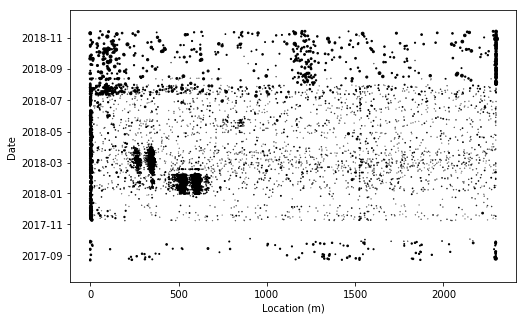

In [5]:
plt.rcParams['figure.figsize'] = [8, 5]

clusterizer.plot.draw_location_time_scatter(circuit)

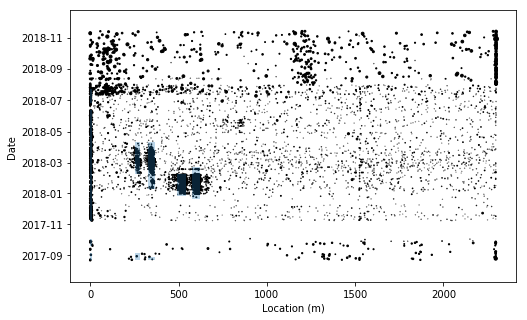

328m to 364m; 2017-08-22T00:25:00.000000000 until 2017-08-29T00:25:00.000000000; Found by: Poisson 2D
492m to 544m; 2017-12-26T00:25:00.000000000 until 2018-02-06T00:25:00.000000000; Found by: Poisson 2D
328m to 364m; 2018-01-09T00:25:00.000000000 until 2018-04-10T00:25:00.000000000; Found by: Poisson 2D
256m to 280m; 2018-02-06T00:25:00.000000000 until 2018-04-10T00:25:00.000000000; Found by: Poisson 2D
256m to 280m; 2017-08-22T00:25:00.000000000 until 2017-09-05T00:25:00.000000000; Found by: Poisson 2D
0m to 12m; 2017-09-19T00:25:00.000000000 until 2017-10-03T00:25:00.000000000; Found by: Poisson 2D
0m to 12m; 2017-11-07T00:25:00.000000000 until 2018-06-12T00:25:00.000000000; Found by: Poisson 2D
0m to 12m; 2017-08-22T00:25:00.000000000 until 2017-09-05T00:25:00.000000000; Found by: Poisson 2D
0m to 12m; 2018-06-26T00:25:00.000000000 until 2018-07-24T00:25:00.000000000; Found by: Poisson 2D
576m to 624m; 2017-12-19T00:25:00.000000000 until 2018-02-20T00:25:00.000000000; Found by: Poi

In [6]:
clusters_poisson = clusterizer.algorithms.clusterize_poisson(circuit)
clusterizer.plot.draw_location_time_scatter(circuit)
clusterizer.plot.overlay_cluster_collection(clusters_poisson)
plt.show()
for clust in clusters_poisson:
    print(clust)

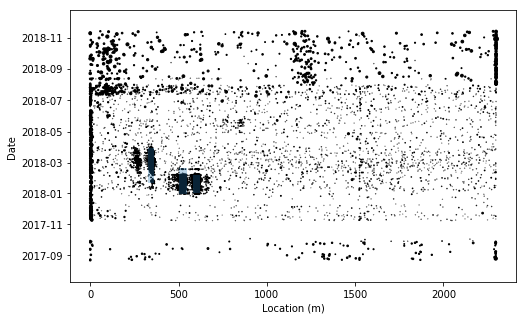

504m to 546m; 2017-12-30T06:02:00.000000 until 2018-02-18T03:48:00.000000; Found by: DBSCAN
328m to 363m; 2018-01-20T17:11:00.000000 until 2018-03-29T22:10:00.000000; Found by: DBSCAN
581m to 620m; 2017-12-30T20:19:00.000000 until 2018-02-05T14:07:00.000000; Found by: DBSCAN


In [7]:
clusters_DBSCAN = clusterizer.algorithms.clusterize_DBSCAN(circuit)
clusterizer.plot.draw_location_time_scatter(circuit)
clusterizer.plot.overlay_cluster_collection(clusters_DBSCAN)
plt.show()
for clust in clusters_DBSCAN:
    print(clust)

# ClusterEnsemble

Een ClusterEnsemble is een set van ClusterSet objecten. Een ClusterSet is een set van Cluster objecten. Deze gestapelde structuur zorgt ervoor dat clusters die bij elkaar horen in dezelfde ClusterSet worden gestopt, en verschillende clusters gescheiden blijven.
Door twee clusters bij elkaar op te tellen met + kun je de resultaten van meerdere algoritmes combineren.

In [34]:
ensemble_poisson = clusterizer.ensemble.ClusterEnsemble.from_iterable(clusters_poisson)
ensemble_DBSCAN = clusterizer.ensemble.ClusterEnsemble.from_iterable(clusters_DBSCAN)
ensemble_combined = ensemble_poisson + ensemble_DBSCAN
ensemble_combined = ensemble_combined.most_confident()

In [35]:
clusters_poisson_e = [c for c in ensemble_combined.get_clusters() if c.found_by == {"Poisson 2D"}]
clusters_DBSCAN_e = [c for c in ensemble_combined.get_clusters() if c.found_by == {"DBSCAN"}]
clusters_both = [c for c in ensemble_combined.get_clusters() if len(c.found_by) > 1]
clusters_poisson_and_both = [c for c in ensemble_combined.get_clusters() if c.found_by >= {"Poisson 2D"}]

<IPython.core.display.Javascript object>


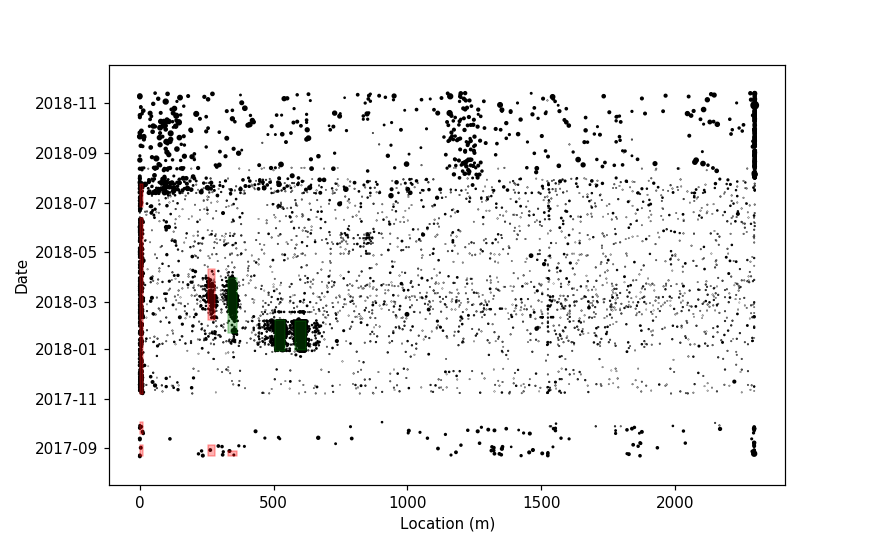

In [36]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]

ax = plt.gca()
clusterizer.plot.draw_location_time_scatter(circuit, ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_poisson_e, color="Red", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_DBSCAN_e, color="Blue", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_both, color="Green", ax=ax)
plt.show()

### clusterize_ensemble

Door algoritmes mee te geven aan clusterize_ensemble kun je in 1 keer meerdere algoritmes toepassen op een circuit. De resultaten van de algoritmes worden gecombineerd in een ClusterEnsemble.

In [79]:
poisson_different_param = lambda circuit: clusterizer.algorithms.clusterize_poisson(circuit, certainty=.99999, name="Strict")
algorithms = [poisson_different_param, clusterizer.algorithms.clusterize_poisson, clusterizer.algorithms.clusterize_DBSCAN]
ensemble_combined = clusterizer.algorithms.clusterize_ensemble(circuit, algorithms)
print(ensemble_combined)

{{504m to 512m; 2018-02-06T00:25:00.000000000 until 2018-02-18T03:48:00.000000; Found by: DBSCAN
512m to 546m; 2018-02-06T00:25:00.000000000 until 2018-02-18T03:48:00.000000; Found by: DBSCAN
544m to 546m; 2017-12-30T06:02:00.000000 until 2018-02-06T00:25:00.000000000; Found by: DBSCAN
540m to 544m; 2017-12-30T06:02:00.000000 until 2018-02-06T00:25:00.000000000; Found by: Poisson 2D, DBSCAN
512m to 540m; 2017-12-26T00:25:00.000000000 until 2017-12-30T06:02:00.000000; Found by: Poisson 2D, Strict
512m to 540m; 2017-12-30T06:02:00.000000 until 2018-02-06T00:25:00.000000000; Found by: Poisson 2D, DBSCAN, Strict
504m to 512m; 2017-12-30T06:02:00.000000 until 2018-02-06T00:25:00.000000000; Found by: Poisson 2D, DBSCAN
492m to 504m; 2017-12-30T06:02:00.000000 until 2018-02-06T00:25:00.000000000; Found by: Poisson 2D
492m to 504m; 2017-12-26T00:25:00.000000000 until 2017-12-30T06:02:00.000000; Found by: Poisson 2D
540m to 544m; 2017-12-26T00:25:00.000000000 until 2017-12-30T06:02:00.000000; F

<IPython.core.display.Javascript object>


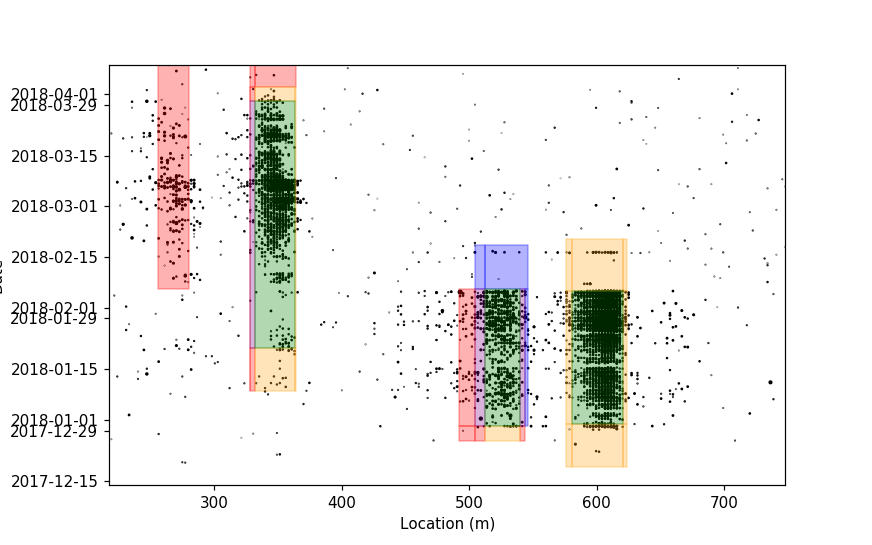

In [101]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]

clusters_poisson_e = [c for c in ensemble_combined.get_clusters() if c.found_by == {"Poisson 2D"}]
clusters_poisson_strict = [c for c in ensemble_combined.get_clusters() if c.found_by >= {"Strict"} and "DBSCAN" not in c.found_by]
clusters_DBSCAN_e = [c for c in ensemble_combined.get_clusters() if c.found_by == {"DBSCAN"}]
clusters_all = [c for c in ensemble_combined.get_clusters() if len(c.found_by) > 2]
clusters_poisson_DBSCAN = [c for c in ensemble_combined.get_clusters() if c.found_by == {"Poisson 2D", "DBSCAN"}]

ax = plt.gca()
clusterizer.plot.draw_location_time_scatter(circuit, ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_poisson_e, color="Red", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_DBSCAN_e, color="Blue", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_poisson_strict, color="#FFA71A", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_poisson_DBSCAN, color="Purple", ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters_both, color="Green", ax=ax)

plt.show()

<IPython.core.display.Javascript object>


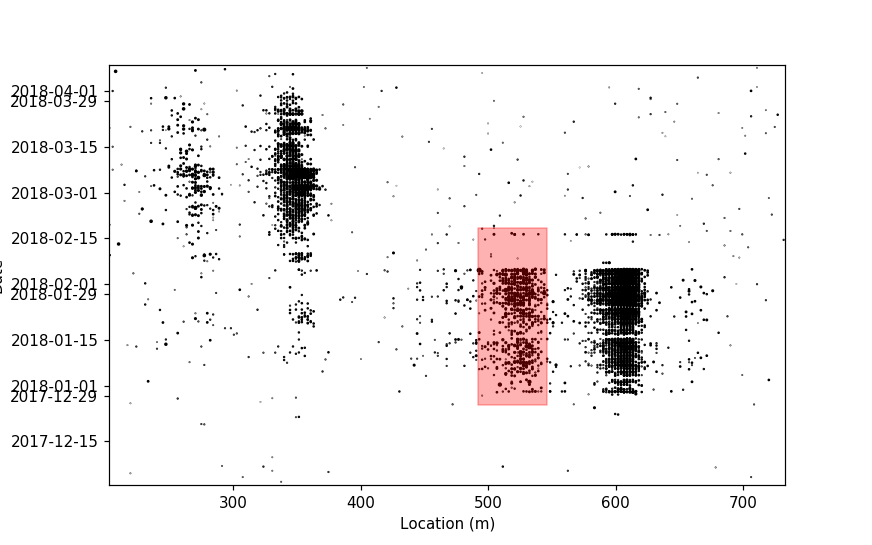

In [103]:
%matplotlib notebook

one_cluster = ensemble_combined.as_list()[0]

bounding_box = one_cluster.as_list()[0]
for c in one_cluster:
    bounding_box |= c

plt.cla()
ax = plt.gca()
clusterizer.plot.draw_location_time_scatter(circuit, ax=ax)
clusterizer.plot.overlay_cluster_collection([bounding_box], color="Red", ax=ax)